In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays, u_darrays, u_met
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader
import pandas as pd
import pickle as pkl
from utils import constants as cnst


coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [47]:
path = cnst.network_data + 'data/OBS/MSG_WA30/track_back_cores_vn1_17Z.txt'
dic = pd.read_table(path, delim_whitespace=True, header=None, names=['year' ,'mon' ,'day', 'i_core' ,'j_core' ,'i_initiation' ,'j_initiation', 'core_time', 'initiation_time'])

In [57]:
np.unique(dic['initiation_time'])

array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,
        7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. , 12.5,
       13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 99.9])

In [ ]:
# initiation time missing: 99.9 , xinit: -99, 

In [60]:
np.unique(dic['initiation_time'][dic['i_initiation']==-99])

array([ 2. , 99.9])

In [65]:
np.unique(dic['i_initiation'][dic['initiation_time']==99.9])

array([-99])

In [19]:
np.unique(dic['i_core'])

array([255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267,
       268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
       281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293,
       294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306,
       307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319,
       320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332,
       333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345,
       346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358,
       359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371,
       372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384,
       385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397,
       398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410,
       411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423,
       424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 43

In [31]:
init = dic['initiation_time']

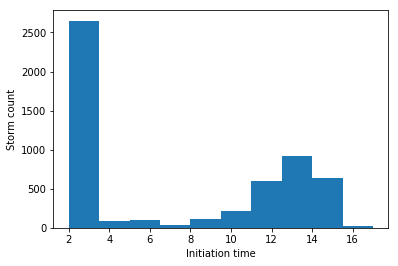

In [32]:
f = plt.figure()
plt.hist(init, range=(2,17))
plt.ylabel('Storm count')
plt.xlabel('Initiation time')
f.savefig('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/propagating/storm_number_new.jpg')

In [27]:
np.sum(init>13)

1052

In [28]:
np.sum(init<=6)

2840

In [58]:
def merge_tab(h):
    outpath = '/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/'
    msgopen = pd.read_csv(outpath + 'cores_gt15000km2_table_AMSRE_'+str(h)+'.csv')
    path = cnst.network_data + 'data/OBS/MSG_WA30/track_back_cores_vn1_'+str(h)+'Z.txt'
    dic = pd.read_table(path, delim_whitespace=True, header=None, names=['year' ,'mon' ,'day', 'i_core' ,'j_core' ,'i_initiation' ,'j_initiation', 'core_time', 'initiation_time'])
    msgopen['initTime'] = np.nan
    msgopen['xinit'] = np.nan
    msgopen['yinit'] = np.nan
    msgopen['xdiff']= np.nan
    for dids, dit in msgopen.iterrows():
        ddic = dic[(dic['i_core']==dit['xloc']) & (dic['j_core']==dit['yloc']) & (dic['year']==dit['year']) & (dic['mon']==dit['month'])  & (dic['day']== dit['day'])]
        msgopen['initTime'] = dic['initiation_time']
        msgopen['xinit'] = dic['i_initiation']
        msgopen['yinit'] = dic['j_initiation']
        msgopen['xdiff'] = dic['i_initiation']-dic['i_core']
    #msgopen = msgopen[(msgopen['initTime']!= 99.9)& (msgopen['xinit'] != -99)]
    #ipdb.set_trace()
    msgopen.to_csv(outpath + "cores_gt15000km2_table_AMSRE_tracking_" + str(h) + ".csv", na_rep=-999, index_label='id')

In [59]:
merge_tab(17)

In [23]:
msgopen = pd.read_csv('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/cores_gt15000km2_table_AMSRE_tracking_17.csv')

In [27]:
outpath = '/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/'
h=17
msgopen = msgopen[(msgopen['initTime']!= 99.9)& (msgopen['xinit'] != -99)]
msgopen.to_csv(outpath + "cores_gt15000km2_table_AMSRE_tracking_" + str(h) + ".csv", na_rep=-999, index_label='id')

In [28]:
msgopen.head()

,id,id.1,year,month,day,hour,lon,lat,xloc,yloc,...,csize,t,storm_id,SMmean,SMdry,SMwet,initTime,xinit,yinit,xdiff
0,0,0,2006,6,1,17,8.505220,10.278089,915,231,...,28.0,-79.117902,3,-999.000000,-999.0,-999.0,14.0,931,249,16
1,1,1,2006,6,1,17,4.103475,10.811426,756,251,...,27.0,-75.433037,2,-999.000000,1.0,0.0,5.0,927,324,171
2,2,2,2006,6,1,17,9.717946,11.432437,957,272,...,34.0,-76.449956,3,-999.000000,-999.0,-999.0,14.0,931,249,-26
3,3,3,2006,6,1,17,9.628114,11.609619,953,278,...,15.0,-78.000000,3,-999.000000,-999.0,-999.0,14.0,931,249,-22
4,4,4,2006,6,1,17,-4.385604,15.388820,451,412,...,16.0,-73.036316,5,-0.357709,0.0,2.0,13.0,385,399,-66


In [29]:
msgopen

,id,id.1,year,month,day,hour,lon,lat,xloc,yloc,...,csize,t,storm_id,SMmean,SMdry,SMwet,initTime,xinit,yinit,xdiff
0,0,0,2006,6,1,17,8.505220,10.278089,915,231,...,28.0,-79.117902,3,-999.000000,-999.0,-999.0,14.0,931,249,16
1,1,1,2006,6,1,17,4.103475,10.811426,756,251,...,27.0,-75.433037,2,-999.000000,1.0,0.0,5.0,927,324,171
2,2,2,2006,6,1,17,9.717946,11.432437,957,272,...,34.0,-76.449956,3,-999.000000,-999.0,-999.0,14.0,931,249,-26
3,3,3,2006,6,1,17,9.628114,11.609619,953,278,...,15.0,-78.000000,3,-999.000000,-999.0,-999.0,14.0,931,249,-22
4,4,4,2006,6,1,17,-4.385604,15.388820,451,412,...,16.0,-73.036316,5,-0.357709,0.0,2.0,13.0,385,399,-66
5,5,5,2006,6,2,17,-2.409310,10.322570,519,233,...,15.0,-78.550504,1,-999.000000,1.0,0.0,8.0,662,330,143
6,6,6,2006,6,2,17,7.696737,10.411511,886,236,...,20.0,-72.328282,4,-3.037871,1.0,0.0,12.5,928,196,42
7,7,7,2006,6,2,17,7.651821,10.455972,884,237,...,15.0,-72.272672,4,-2.749292,1.0,0.0,12.5,928,196,44
8,8,8,2006,6,2,17,-2.768636,10.589316,506,243,...,34.0,-83.721078,1,-999.000000,1.0,0.0,8.0,662,330,156
9,9,9,2006,6,2,17,-3.172878,10.855828,492,252,...,15.0,-83.635033,1,-999.000000,1.0,0.0,8.0,662,330,170


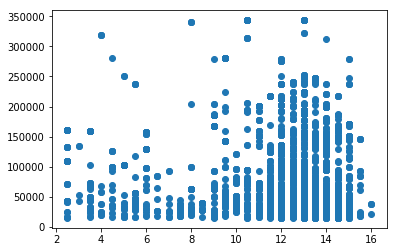

In [34]:
scat = msgopen[(msgopen['initTime'] >= 2) & (msgopen['initTime'] <=17)]
plt.scatter(scat['initTime'], scat['area'])

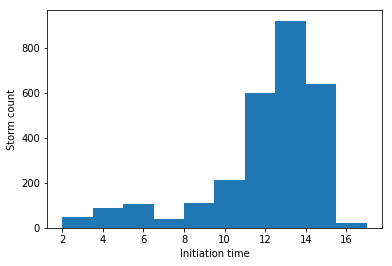

In [35]:
f = plt.figure()
plt.hist(msgopen['initTime'], range=(2,17))
plt.ylabel('Storm count')
plt.xlabel('Initiation time')
f.savefig('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/propagating/storm_number_new.jpg')

(0, 600)

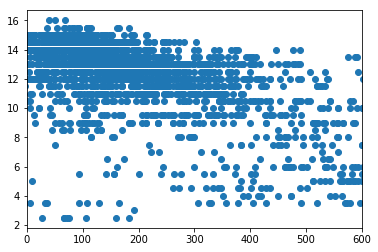

In [44]:
plt.scatter(msgopen['xdiff']*3,msgopen['initTime'])
plt.xlim(0,600)

In [13]:
np.unique(msgopen['initTime'])

array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,
        7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. , 12.5,
       13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 99.9])

In [41]:
msgopen['velocity'] = msgopen['deltaDist']/msgopen['deltaH']

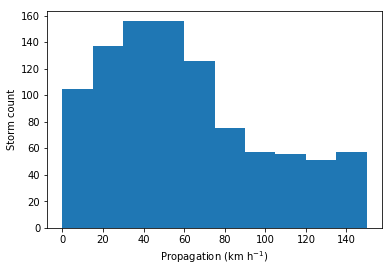

In [42]:
f = plt.figure()
plt.hist(msgopen['velocity'][msgopen['velocity']>0], range=(0,150))
plt.xlabel('Propagation (km h$^{-1}$)')
plt.ylabel('Storm count')
# max around 30-50km per hour. 
f.savefig('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/propagating/storm_propagation.jpg')

In [48]:
np.median((msgopen['area'])[(msgopen['initTime']>=13) & (msgopen['initTime']<17)])

51200.0

In [49]:
np.median((msgopen['area'])[(msgopen['initTime']<=3) & (msgopen['initTime']>0)])

61562.5

(array([370., 223., 117.,  94.,  78.,  78.,  42.,  24.,  46.,  53.]),
 array([ 15000.,  28500.,  42000.,  55500.,  69000.,  82500.,  96000.,
        109500., 123000., 136500., 150000.]),
 <a list of 10 Patch objects>)

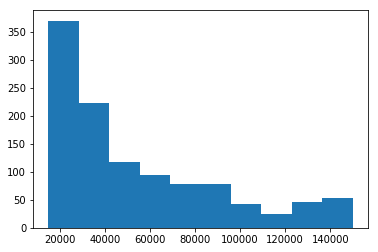

In [55]:
plt.hist((msgopen['area'])[(msgopen['initTime']>=13) & (msgopen['initTime']<17)], range=(15000,150000), bins=10)

(array([545., 328., 316., 213., 131., 136., 131.,  88., 100.,  73.]),
 array([ 15000.,  28500.,  42000.,  55500.,  69000.,  82500.,  96000.,
        109500., 123000., 136500., 150000.]),
 <a list of 10 Patch objects>)

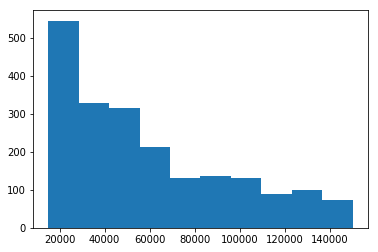

In [56]:
plt.hist((msgopen['area'])[(msgopen['initTime']<=3) & (msgopen['initTime']>0)], range=(15000,150000), bins=10)

In [92]:
initmsg = msgopen[msgopen['initTime']>=13].copy()

In [114]:
for key in ['storm_id', 'year', 'month', 'day']:
    initmsg[key] = initmsg[key].astype(np.str)

In [117]:
np.unique(initmsg['storm_id'] + initmsg['year'] + initmsg['month'] + initmsg['day']).shape

(455,)

In [118]:
propagationmsg = msgopen[msgopen['initTime']<=6].copy()

In [119]:
for key in ['storm_id', 'year', 'month', 'day']:
    propagationmsg[key] = propagationmsg[key].astype(np.str)

In [120]:
np.unique(propagationmsg['storm_id'] + propagationmsg['year'] + propagationmsg['month'] + propagationmsg['day']).shape

(745,)